**Importing Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
#it's gives as tuple
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#Explore our data set
X_train.shape

(60000, 28, 28)

In [5]:
single_img = X_train[0]

In [7]:
#This is a gray scale img i.e arrays values range from 0 to 255
#single_img

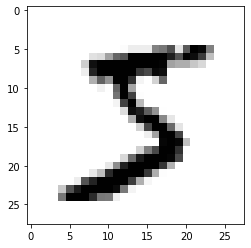

In [8]:
plt.imshow(single_img, cmap='binary')

In [9]:
#Explore our labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_train.shape

(60000,)

In [11]:
#if we put these data into our model it assume that values are continues
#but the values are categorical to we need to convert it into 
#categoriacal data with the help of tensorflow or pandas as
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test)

In [13]:
#now it's right
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test.shape

(10000, 10)

In [15]:
#As we are going to train CNN so we have to normalise our data as
#one way is to use MinMax() Scaler
#or we just divive by 255 which works better for new data
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[0].max()

1.0

In [17]:
X_train[0].min()

0.0

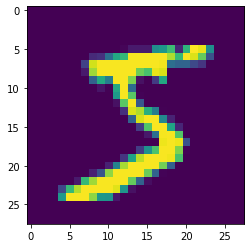

In [18]:
#As the ratio is mantained so we get rigth image
plt.imshow(X_train[0])

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
#For CNN to know colour RGB channel we add 4th dimension as
# batch_size, width, height, color_channel
X_train = X_train.reshape(60000, 28, 28,1)

In [21]:
X_train.shape

(60000, 28, 28, 1)

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
#same for X_test
X_test = X_test.reshape(10000, 28, 28,1)

In [24]:
X_test.shape

(10000, 28, 28, 1)

## Model Training

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

#put filters in power of 2
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


#after the series of above two layers we have to add a flatten()
#layer after it we can add our dense layer
model.add(Flatten())

model.add(Dense(128,activation='relu'))

# output layer SOFTMAX --> Bcz it's a Multi Class problem
model.add(Dense(10,activation='softmax'))

# now time to compile
# keras.io/metrics
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
28*28

784

#Metrices
keras.io/metrics

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [31]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),
                                            callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 495us/sample - loss: 0.1445 - accuracy: 0.9570 - val_loss: 0.0622 - val_accuracy: 0.9805
Epoch 2/10
60000/60000 [==============================] - 28s 470us/sample - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0439 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.0301 - accuracy: 0.9903 - val_loss: 0.0401 - val_accuracy: 0.9865
Epoch 4/10
60000/60000 [==============================] - 26s 436us/sample - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0411 - val_accuracy: 0.9876


In [32]:
metrics = pd.DataFrame(model.history.history)

In [33]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.144468,0.956983,0.062151,0.9805
1,0.048010,0.985317,0.043937,0.9863
2,0.030100,0.990300,0.040125,0.9865
3,0.020341,0.993733,0.041110,0.9876


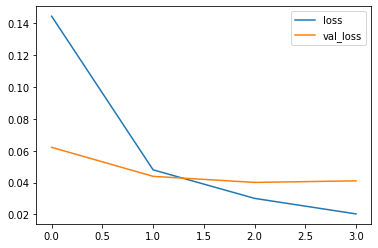

In [34]:
metrics[['loss', 'val_loss']].plot()

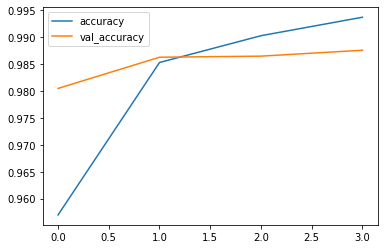

In [36]:
metrics[['accuracy','val_accuracy']].plot()

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.evaluate(X_test,y_cat_test, verbose=1)

10000/10000 [==============================] - 1s 117us/sample - loss: 0.0411 - accuracy: 0.9876


[0.041110461181559366, 0.9876]

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
pred = model.predict_classes(X_test)

In [41]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [43]:
print(confusion_matrix(y_test,pred))

[[ 977    0    0    1    0    1    1    0    0    0]
 [   1 1128    1    2    0    0    1    0    2    0]
 [   4    1 1016    1    1    0    1    5    3    0]
 [   0    0    0 1002    0    3    0    2    3    0]
 [   0    0    1    0  970    0    2    0    2    7]
 [   2    0    0    3    0  884    2    0    1    0]
 [   6    2    0    0    3    4  940    0    3    0]
 [   0    0    6    1    0    0    0 1017    2    2]
 [   3    0    2    0    0    1    0    2  964    2]
 [   0    1    0    3    7    9    0    7    4  978]]


(10, 0)

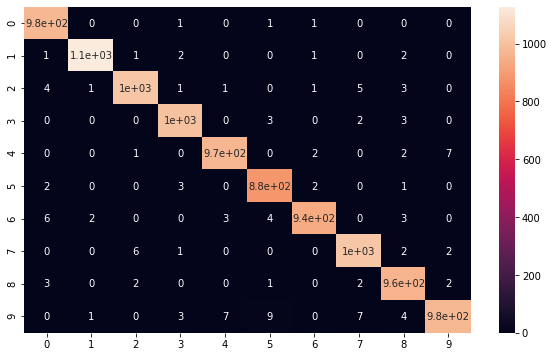

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.ylim(10,0)

In [72]:
#for single img pridiction
my_img = X_test[0]

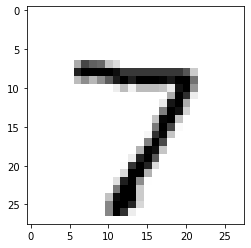

In [80]:
plt.imshow(my_img.reshape(28,28), cmap='binary')

In [78]:
#num_image,width,height,color_channel
my_pred = model.predict_classes(my_img.reshape(1,28,28,1))

In [79]:
my_pred

array([7])